In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA

import math
from scipy.integrate import quad
from scipy.misc import derivative

Spin boson model solution (based on Gernot's Example: https://www1.itp.tu-berlin.de/schaller/download/TOQT.pdf page 136)

$ H_S= \frac{\omega}{2} \sigma_z + \frac{\Delta}{2} \sigma_x $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$

Exact solution:  pure-dephasing limit ($\Delta=0$)

$ H_S= \frac{\omega}{2} \sigma_z  $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$ 

The populatios remain unafected since $H_I$ conmustes with $H_S$, but the coherenes decay accroding to(in the interaction picture) : 

$\rho_{01}(t)=\exp \left\{-\frac{4}{\pi} \int_{0}^{\infty} J^{(0)}(\omega) \frac{\sin ^{2}(\omega t / 2)}{\omega^{2}} \operatorname{coth}\left(\frac{\beta \omega}{2}\right) d \omega\right\} \rho_{01}^{0}$


We will use this example for spectral densury 


$J^{(0)}(\omega)=2 \pi \sum_{k}\left|t_{k}\right|^{2} \delta\left(\omega-\omega_{k}\right)=\Gamma \frac{\omega \delta^{7}}{\left[(\omega-\epsilon)^{2}+\delta^{2}\right]^{2}\left[(\omega+\epsilon)^{2}+\delta^{2}\right]^{2}}$

with this paremeters:

$\mathbf{\Gamma} \beta=10000, \delta \beta=\mathbf{1}, \boldsymbol{\epsilon} \beta=2, \omega \beta=1$

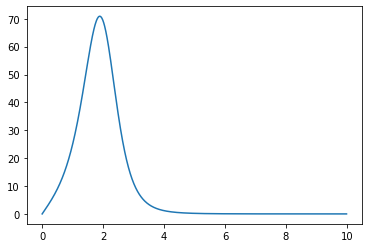

In [2]:
#set 1
beta= 1.0
Gamma=  10000.0/beta
delta= 1.0/beta
epsilon = 2.0 /beta 
omega=1.0/beta

#set 2
#beta= 1.0
#Gamma=  20/beta
#delta= 1.0/beta
#epsilon = 2.0 /beta 
#omega=10.0/beta


rho_01_init=0.5

def J(w):
    return Gamma * ((w * delta**7) /(((w-epsilon)**2+delta**2)**2 * ((w+epsilon)**2+delta**2)**2 ))

#print (J(0.0))
vecfunc = np.vectorize(J)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

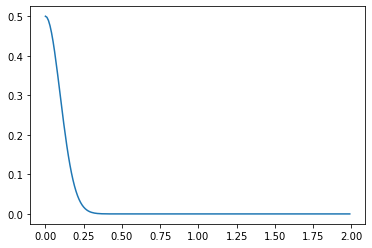

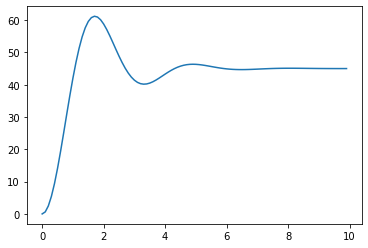

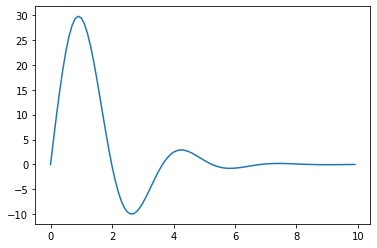

In [3]:
def integrand(w, t):
    return J(w)* (np.sin(w*t/2))**2 / (w**2)  / np.tanh (beta*w /2 )


def expint(t):
    return quad(integrand, 0, np.inf, args=(t))[0]


def rho_01(t):
    return np.exp(-4.0/np.pi * expint(t) ) * rho_01_init

vecfunc = np.vectorize(rho_01)
t1 = np.arange(0.0, 2.0, 0.01)
T1 = vecfunc(t1)
plt.plot (t1, T1)
plt.show()

def energy_sol(t):
    tmp = lambda w, t: (4/np.pi) * (J(w) / w) * np.sin(w * t/2)**2
    return quad(tmp, 0, np.inf, args=(t))[0]

def energy_sol_der(t):
    return derivative(energy_sol, t)

vecfunc = np.vectorize(energy_sol)
t2 = np.arange(0.0, 10.0, 0.1)
E1 = vecfunc(t2)
plt.plot(t2, E1)
plt.show()

vecfunc = np.vectorize(energy_sol_der)
t2 = np.arange(0.0, 10.0, 0.1)
dE1 = vecfunc(t2)
plt.plot(t2, dE1)
plt.show()

Now we apply the reaccion coodinate mapping :

$  H_0= \frac{\omega}{2} \sigma_z +  \Omega_0 b ^{\dagger} b +g \sigma_z  \left( b + b ^{\dagger} \right) + \frac{g^2}{\Omega} \sigma_z^2 + \Omega \Delta_{RC} \left( b + b ^{\dagger} \right)^2$

$   H_B= \sum_{k} \Omega_k b_k ^{\dagger} b_k $

$   H_I= \left( b + b ^{\dagger} \right) \sum_k h_k \left( b_k + b_k ^{\dagger} \right)$

where the energy of the RC and the coupling strength become:

$\Omega_{0}^{2}=\frac{\left(\delta^{2}+\epsilon^{2}\right)^{2}}{5 \delta^{2}+\epsilon^{2}}, \quad g^{2}=\frac{\Gamma \delta^{4} \sqrt{5 \delta^{2}+\epsilon^{2}}}{64\left(\delta^{2}+\epsilon^{2}\right)^{2}}
$


The mapping transformation can be computed explicitly, where the transformed spectral density becomes ohmic:

$ J^{(1)}(\omega)=\frac{16 \omega \delta^{3} \sqrt{5 \delta^{2}+\epsilon^{2}}}{\omega^{4}+\omega^{2}\left(6 \delta^{2}-2 \epsilon^{2}\right)+\left(5 \delta^{2}+\epsilon^{2}\right)^{2}} $


And the renormalization energy as $\Delta_{RC}$: 

$\Omega_{0} \cdot \Delta_{RC} \equiv \sum_{k} \frac{h_{k}^{2}}{\Omega_{k}}=\frac{1}{2 \pi} \int_{0}^{\infty} \frac{J^{(1)}(\omega)}{\omega} d \omega$



1.6666666666666667
4.330127018922194


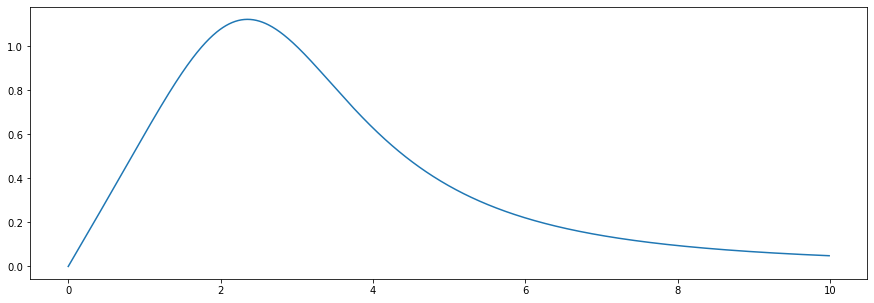

1.6666666666666667 4.330127018922194 0.2


In [106]:
##We build the supersystem Hamiltonian with N_RC number of modes for the RC

N_RC = 5 # number of basis states to consider
b = destroy(N_RC)

Omega_Rc=np.sqrt( (delta**2+ epsilon**2 )**2/(5*delta**2+ epsilon**2))
g=np.sqrt( (Gamma*delta**4*np.sqrt(5*delta**2+ epsilon**2))/(64*(delta**2+epsilon**2)**2)  )
print(Omega_Rc)
print(g)

def J_1(w):
    return (16*w*delta**3*np.sqrt(5*delta**2+ epsilon**2))/(w**4+w**2*(6*delta**2-2*epsilon**2)+ (5*delta**2+epsilon**2)**2)

vecfunc = np.vectorize(J_1)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

def integrand(w):
    return  J_1(w)/w

Delta_Rc = (1/(2*np.pi*Omega_Rc))* quad(integrand, 0, np.inf)[0]
Delta_Rc2=0
print(Omega_Rc,g,Delta_Rc)

H0= omega/2 *tensor(sigmaz(), identity(N_RC) )  + Omega_Rc *tensor(identity(2) , b.dag() * b )  + g* tensor(sigmaz(),  b.dag() + b ) + Omega_Rc*Delta_Rc2 *tensor(identity(2) , (b.dag() + b)*(b.dag() + b) )  



In order to aplly the master equation we need to preapre the initial state as: 

$\rho_{0}=\rho_{S}^{0} \otimes \frac{e^{-\beta \Omega\left[b^{\dagger} b\right]}}{Z_{R C}}$

In [107]:
##Rc inicial state Thermal  


H1 = b.dag() * b
H2 = Delta_Rc2*(b.dag()+ b)*(b.dag()+ b)  ##Auxliar Hamiltonians
H_Rc= -beta*Omega_Rc*(H1+H2)
Exp= H_Rc.expm()
Z_Rc=Exp.tr()
rho_Rc_init=Exp/Z_Rc

#print(rho_Rc_init)

#Sistem inital state
psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1) )
#psi0 =  basis(2, 0) 

##Spin Inicial state 
rho_Spin= psi0*psi0.dag()
#print(rho_Spin)

###Tensor producto of the initial state
rho_init=tensor(rho_Spin,rho_Rc_init) 

print(rho_init.ptrace(0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


The evolutions is given by the master equation (in the interaction picture):

$\dot{\boldsymbol{\rho}}_{0}(t)=\gamma' \left(b \boldsymbol{\rho}_{0}(t) b^{\dagger}-\frac{1}{2}\left\{b^{\dagger} b, \boldsymbol{\rho}_{0}(t)\right\}\right)+\bar{\gamma}' \left(b^{\dagger} \boldsymbol{\rho}_{0}(t) b-\frac{1}{2}\left\{b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right\}\right)-\mathrm{i}\left[\frac{\sigma}{2} b^{\dagger} b+\frac{\bar{\sigma}}{2} b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right]$


where $\gamma'=J(\Omega)\left[1+n_{B}(\Omega)\right]$ , $ \bar{\gamma}' = J(\Omega) n_{B}(\Omega)$ and $n_{B}(\omega)=\left[e^{\beta \omega}-1\right]^{-1}$

and 
$\sigma =\sigma(\Omega)=\frac{\mathrm{i}}{\pi} \mathcal{P} \int_{-\infty}^{+\infty} \frac{\gamma(\Omega')}{\Omega-\Omega'} d \Omega'$

In [108]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma_prime(w):
    if w==0:
        return 0.592592
    else:
        return J_1(w)*(1+nb(w))

gamma_prime_n= J_1(Omega_Rc)*(1+nb(Omega_Rc))
gamma_bar_prime_n= J_1(Omega_Rc)*nb(Omega_Rc)

print(gamma_prime_n,gamma_bar_prime_n , gamma_prime(Omega_Rc))
print(gamma_prime(0.0))

1.186002113574108 0.22400686416793208 1.186002113574108
0.592592


In [109]:
#from sympy import oo
#from sympy.integrals.integrals import Integral
#from sympy.abc import x

#Calculate the lamb Shift 
#Integral(gamma_prime(x)/(Omega_Rc-x), (x, -oo, oo)).principal_value()

aux1= gamma_prime_n/2.0 * tensor(identity(2) ,   b.dag()*b)
aux2= gamma_bar_prime_n/2.0 * tensor(identity(2) ,  b * b.dag())
aux3= g/Omega_Rc* ( gamma_prime_n/2.0 + gamma_bar_prime_n/2.0)*tensor(sigmaz() ,  b )
aux4= g/Omega_Rc* ( gamma_prime_n/2.0 + gamma_bar_prime_n/2.0)*tensor(sigmaz() ,  b.dag() )

Lamb=aux1+aux2+aux3+aux4

The decays follow the matrix 

$h= \left(\begin{array}{ccc}\gamma & 0 & \frac{g \gamma}{\Omega} \\ 0 & \bar{\gamma} & \frac{g \bar{\gamma}}{\Omega} \\ \frac{g \gamma}{\Omega} & \frac{g \bar{\gamma}}{\Omega} & \frac{g^{2}(\bar{\gamma}+\gamma)}{\Omega^{2}}\end{array}\right)$

We define the new Limbland opetaros and decays as :

$u^{\dagger} h u=\left[\begin{array}{cccc}\gamma_{1} & 0 & \cdots & 0 \\ 0 & \gamma_{2} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \gamma_{N^{2}}\end{array}\right]$

and: 
$L_{i}=\sum_{j=1}^{N^{2}-1} u_{j i} A_{j}$ i.e $L = U ^{-1} A$ and the vector $A=( b, b ^{\dagger} , \sigma_z)$

In [110]:
# import sympy 
#M = Matrix([[gamma_prime_n, 0, gamma_prime_n*g/Omega_Rc], [0, gamma_bar_prime_n, g*gamma_bar_prime_n/Omega_Rc], [g*gamma_prime_n/Omega_Rc, g*gamma_bar_prime_n/Omega_Rc, g**2*(gamma_prime_n+gamma_bar_prime_n)/Omega_Rc**2]]) 

#test=np.array([[1., 2.], [3., 4.]])
MP = np.array([[gamma_prime_n, 0, gamma_prime_n*g/Omega_Rc], [0, gamma_bar_prime_n, g*gamma_bar_prime_n/Omega_Rc], [g*gamma_prime_n/Omega_Rc, g*gamma_bar_prime_n/Omega_Rc, g**2*(gamma_prime_n+gamma_bar_prime_n)/Omega_Rc**2]])

#w, v = LA.eig(test)
#print(w)
#print(v)

print(MP)

w, v = LA.eig(MP)
print(w)
#print(v)

U=np.array([[0.31174005, -0.68228824,  0.6612873 ],[0.0534015,-0.68228824,-0.72913033],[0.9486656,0.26261287,-0.17626135]])

U_1=LA.inv(U)

print(U)
print(U_1)


[[1.18600211 0.         3.08132388]
 [0.         0.22400686 0.5819869 ]
 [3.08132388 0.5819869  9.5175606 ]]
[1.05628721e+01 4.54793010e-17 3.64697487e-01]
[[ 0.31174005 -0.68228824  0.6612873 ]
 [ 0.0534015  -0.68228824 -0.72913033]
 [ 0.9486656   0.26261287 -0.17626135]]
[[ 0.31174006  0.05340151  0.9486656 ]
 [-0.68228824 -0.68228824  0.26261286]
 [ 0.6612873  -0.72913033 -0.17626135]]


In [111]:
A1=tensor(identity(2) ,  b )
A2=tensor(identity(2) , b.dag()  )
A3=tensor( sigmaz(), identity(N_RC)  )

print(w[1])
L1=U[0][0]*A1+U[1][0]*A2+U[2][0]*A3
L2=U[0][1]*A1+U[1][1]*A2+U[2][1]*A3
L3=U[0][2]*A1+U[1][2]*A2+U[2][2]*A3

gamma1=w[0]
gamma2=0.0 #w[1]
gamma3=w[2]

L=[np.sqrt(gamma1) * L1, np.sqrt(gamma2)*L2,  np.sqrt(gamma3)*L3]

L0=[np.sqrt(gamma_prime_n) * A1, np.sqrt(gamma_bar_prime_n)*A2 ]

4.5479301006572856e-17


We find the the coherences as:

$\left|\rho_{01}\right|=\mid \frac{1}{2} \operatorname{Tr}\left\{\left(\sigma^{x}+\mathrm{i} \sigma^{y}\right) \rho(t)\right\}$

In [112]:
t0 = 0.0
tf = 1.0
time_steps = 500



## Time range
t3 = np.linspace(0, tf, time_steps)

result = mesolve(0*H0, rho_init, t3, L0)


states_IP=result.states
exp_result=[0 for i in range(len(states_IP))]

trace=[0 for i in range(len(states_IP))]

for i in range(len(states_IP)):
    exp_result[i]=  (-1j*H0*t3[i]).expm()* states_IP[i]*  (1j*H0*t3[i]).expm()
    #trace[i]=  states_IP[i].ptrace(0)
    trace[i]=  exp_result[i].ptrace(0)

print(trace[0])    


p01=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    p01[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace[i]))

#print(p01)  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


In [113]:
t0 = 0.0
tf = 1.0
time_steps = 500



## Time range
t3 = np.linspace(0, tf, time_steps)

result = mesolve(0*H0, rho_init, t3)


states_IP=result.states
exp_result=[0 for i in range(len(states_IP))]

trace=[0 for i in range(len(states_IP))]

for i in range(len(states_IP)):
    exp_result[i]=  (-1j*H0*t3[i]).expm()* states_IP[i]*  (1j*H0*t3[i]).expm()
    #trace[i]=  states_IP[i].ptrace(0)
    trace[i]=  exp_result[i].ptrace(0)

print(trace[0])    


p01_carlos=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    p01_carlos[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace[i]))

#print(p01)  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


Now we evolve with the following equation in order to compare: 

$\begin{aligned} \dot{\rho}=-& \mathrm{i}\left[H_{S}^{\prime}, \rho\right]-\int_{0}^{\infty} C(+\tau)\left[\left(b+b^{\dagger}\right), e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} \rho(t)\right] d \tau \\ &-\int_{0}^{\infty} C(-\tau)\left[\rho(t) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+i H_{S}^{\prime} \tau},\left(b+b^{\dagger}\right)\right] d \tau \end{aligned}$

where we need to find the supersystem Hamitionial states $H_{S}^{\prime}\left|a^{\prime}\right\rangle=E_{a}^{\prime}\left|a^{\prime}\right\rangle$, we can find:  

$\int_{0}^{\infty} C(\tau) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} d \tau=\sum_{a b}\left\langle a^{\prime}\left|\left(b+b^{\dagger}\right)\right| b^{\prime}\right\rangle \int_{0}^{\infty} C(\tau) e^{-\mathrm{i}\left(E_{a}^{\prime}-E_{b}^{\prime}\right) \tau} d \tau\left|a^{\prime}\right\rangle\left\langle b^{\prime}\right|$

where: 

$\int_{0}^{\infty} C(\tau) e^{+\mathrm{i}\left(E_{b}^{\prime}-E_{a}^{\prime}\right) \tau} d \tau =\frac{\gamma\left(E_{b}^{\prime}-E_{a}^{\prime}\right)}{2}+\frac{\mathrm{i}}{2 \pi} \mathcal{P} \int \frac{\gamma(\omega)}{E_{b}^{\prime}-E_{a}^{\prime}-\omega} d \omega$ 

where we will negecled the principal value term (lamb Shift) and $\gamma(\omega)=J(\omega)\left[1+n_{B}(\omega)\right]$

In [114]:
all_energy, all_state = H0.eigenstates()

Nmax=N_RC*2

def b_intN(t):
    B = 0
    for j in range(Nmax):
        for k in range(Nmax):
            A = tensor(identity(2),b).matrix_element(all_state[j].dag(), all_state[k])
            delE = (all_energy[j] - all_energy[k])
            B = B + A * np.exp(-1j * delE * t) * all_state[j] * all_state[k].dag() 
    return B

def b_intA(t):
    B1 = (tensor(identity(2),b) + (g/Omega_Rc) * tensor(sigmaz(),identity(N_RC))) *np.exp(1j * Omega_Rc * t)
    B2 = - (g/Omega_Rc) * tensor(sigmaz(),identity(N_RC))
    return B1 + B2
            

In [115]:
test_state = tensor((1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1)), basis(N_RC, 1))

test_stateN = (b_intN(1.5) * test_state).unit()
test_stateA = (b_intA(1.5) * test_state).unit()

fidelity(test_stateN,test_stateA)

0.2559931179318709

In [116]:
test_stateN

Quantum object: dims = [[2, 5], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.03292799-0.1681817j ]
 [-0.06866478-0.14709175j]
 [ 0.49414859-0.02667669j]
 [-0.24484945+0.23577829j]
 [-0.26643229-0.11338667j]
 [ 0.03292799-0.1681817j ]
 [ 0.06866478+0.14709175j]
 [ 0.49414859-0.02667669j]
 [ 0.24484945-0.23577829j]
 [-0.26643229-0.11338667j]]

In [117]:
test_stateA

Quantum object: dims = [[2, 5], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[-0.11259073+0.08410779j]
 [-0.65764648+0.21851844j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [-0.11259073+0.08410779j]
 [ 0.65764648-0.21851844j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]

In [129]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma(w):
    if (w==0):
        return 0.592592
    else:  
        return J_1(w)*(1+nb(w))  

all_energy, all_state = H0.eigenstates()

#
# Redfield equation using the basis expansion
#
Nmax=N_RC*2
Limb_op1=0
Limb_op2=0
for j in range(Nmax):
    for k in range(Nmax):
        A = tensor(identity(2),(b + b.dag())).matrix_element(all_state[j].dag(), all_state[k])
        delE = (all_energy[j] - all_energy[k])
        X1=gamma(-delE)/2
        X2=gamma(delE)/2
        Limb_op1 = Limb_op1 + A*X1*all_state[j] * all_state[k].dag() 
        Limb_op2 = Limb_op2 + A*X2*all_state[j] * all_state[k].dag()
B=tensor(identity(2),b + b.dag())

#
# for the redfield equation with the exact transformation to the einteraction picture
#
b1 = (tensor(identity(2),b) + (g/Omega_Rc) * tensor(sigmaz(),identity(N_RC)))
sz = - 2 * (g/Omega_Rc) * tensor(sigmaz(),identity(N_RC))
Limb_1 = gamma(Omega_Rc)/2 * b1 + gamma(- Omega_Rc)/2 * b1.dag() + gamma(0)/2 * sz
Limb_2 = gamma(- Omega_Rc)/2 * b1 + gamma(Omega_Rc)/2 * b1.dag() + gamma(0)/2 * sz
B_c = tensor(identity(2),b + b.dag())

#
# ME
#
b_ME = tensor(identity(2),b)
Limb_1_ME = np.sqrt(gamma(Omega_Rc)) * b_ME 
Limb_2_ME = np.sqrt(gamma(- Omega_Rc)) * b_ME.dag()

# Total operators
L2 = -spre(B* Limb_op1)+ sprepost(Limb_op1, B)-  spost(Limb_op2*B) +  sprepost( B, Limb_op2)
L2_SP = - spre(B_c * Limb_1) + sprepost(Limb_1, B_c) - spost(Limb_2 * B_c) + sprepost(B_c, Limb_2)
#L2_IP = - spre(B_c * Limb_1_IP) + sprepost(Limb_1_IP, B_c) - spost(Limb_2_IP * B_c) + sprepost(B_c, Limb_2_IP)
#L2_c = - spre(B_c * Limb_op1_c) + sprepost(Limb_op1_c, B_c) - spost(Limb_op2_c * B_c) + sprepost(B_c, Limb_op2_c)

## Time range
t0 = 0.0
tf = 10.0
time_steps = 1000
t = np.linspace(0, tf, time_steps)


psi0 =  basis(2, 0)  
rho_Spin= psi0*psi0.dag()
rho_init_2=tensor(rho_Spin,rho_Rc_init)

output_2 = mesolve(H0, rho_init, t, [L2])

# Redfield equation in the Schroedinger picture
output_SP_c = mesolve(H0, rho_init, t, [L2_SP]) #mesolve(H0, rho_init, t, [L2_SP])

# Redfield equation in the Interaction picture
#output_IP_c = mesolve(tensor(identity(2),identity(N_RC)), rho_init, t, [L2_IP])
output_ME_c = mesolve(H0, rho_init, t, [Limb_1_ME,Limb_2_ME]) #mesolve(H0, rho_init, t, [L2_IP])

In [130]:
states_SP_2=output_2.states
states_SP_c = output_SP_c.states
states_ME_c = output_ME_c.states

# reduced states
trace_2=[0 for i in range(len(states_SP_2))]
for i in range(len(states_SP_2)):
    trace_2[i]=  states_SP_2[i].ptrace(0)

# reduced states SP
reduced_SP_c = [0 for i in range(len(states_SP_c))]
for i in range(len(states_SP_c)):
    reduced_SP_c[i] = states_SP_c[i].ptrace(0)
    
# reduced states ME   
reduced_ME_c = [0 for i in range(len(states_ME_c))]
for i in range(len(states_ME_c)):
    reduced_ME_c[i] =  states_ME_c[i].ptrace(0)    
    
# rho_01 component
p01_2=[0 for i in range(len(trace_2))]
for i in range(len(states_SP_2)):
    p01_2[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_2[i]))

# rho_01 component SP
p01_SP_c=[0 for i in range(len(reduced_SP_c))]
for i in range(len(reduced_SP_c)):
    p01_SP_c[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),reduced_SP_c[i]))

# rho_01 component ME
p01_ME_c=[0 for i in range(len(reduced_ME_c))]
for i in range(len(reduced_ME_c)):
    p01_ME_c[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),reduced_ME_c[i]))

In [131]:
# from SP to IP
states_SP_IP_c=[0 for i in range(len(states_SP_c))] 
for i in range(len(states_SP_c)):
    states_SP_IP_c[i]=  (-1j*H0*t[i]).expm()* states_SP_c[i]*  (1j*H0*t[i]).expm()

# reduced states SP to IP   
reduced_SP_IP_c = [0 for i in range(len(states_SP_IP_c))]
for i in range(len(states_SP_IP_c)):
    reduced_SP_IP_c[i]=  states_SP_IP_c[i].ptrace(0)
        
# rho_01 component SP to IP
p01_SP_IP_c=[0 for i in range(len(reduced_SP_IP_c))]
for i in range(len(reduced_SP_IP_c)):
    p01_SP_IP_c[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),reduced_SP_IP_c[i]))  

In [132]:
# Energy

GernotE = - g * expect(tensor(sigmaz(),(b + b.dag())),states_SP_2)
CarlosE_SP = - g * expect(tensor(sigmaz(),(b + b.dag())),states_SP_c)
CarlosE_ME = - g * expect(tensor(sigmaz(),(b + b.dag())),states_ME_c)

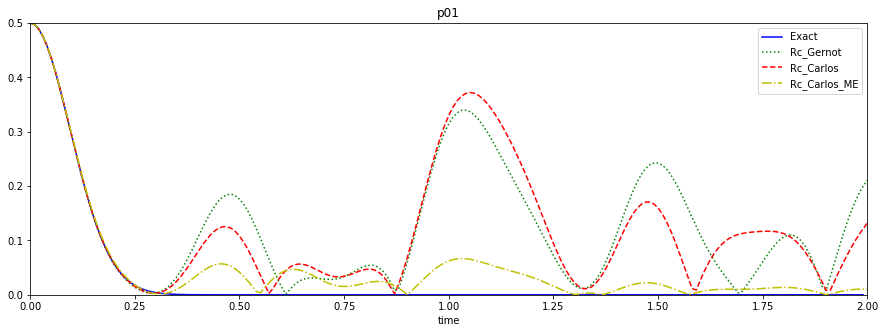

In [133]:
plt.figure(figsize=(15,5))
plt.title("p01")
plt.rcParams['figure.figsize'] = [15,5]
#plt.plot(t3,p01,"-",label='Rc_mine', color = "g")
#plt.plot(t3,p01_carlos,"--",label='Rc_justUnitary', color = "r")
plt.plot (t1 , T1,"-",label='Exact', color = "b") ###if scaled with 1.25 they are the same
plt.plot(t,p01_2,":",label='Rc_Gernot', color = "g")
plt.plot(t,p01_SP_c,"--",label='Rc_Carlos', color = "r")
plt.plot(t,p01_ME_c,"-.",label='Rc_Carlos_ME', color = "y")
plt.ylim([0,0.5])
plt.xlim([0,2.0])
#plt.plot(tlist, result.expect[0])
plt.xlabel("time")
plt.legend()
plt.show()

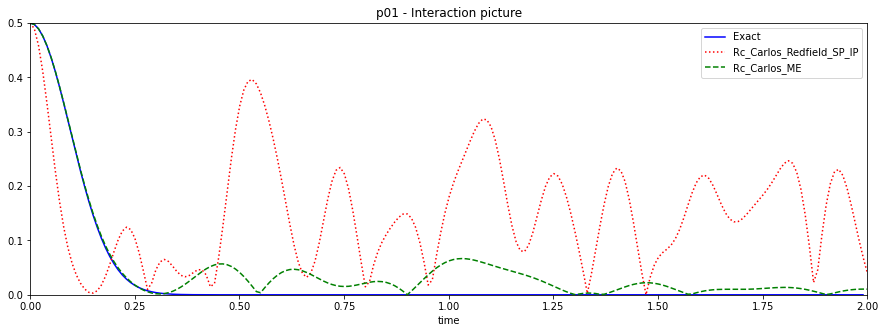

In [134]:
plt.figure(figsize=(15,5))
plt.title("p01 - Interaction picture")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot (t1 , T1,"-",label='Exact', color = "b")
plt.plot(t,p01_SP_IP_c,":",label='Rc_Carlos_Redfield_SP_IP', color = "r")
plt.plot(t,p01_ME_c,"--",label='Rc_Carlos_ME', color = "g")
plt.ylim([0,0.5])
plt.xlim([0,2.0])
#plt.plot(tlist, result.expect[0])
plt.xlabel("time")
plt.legend()
plt.show()

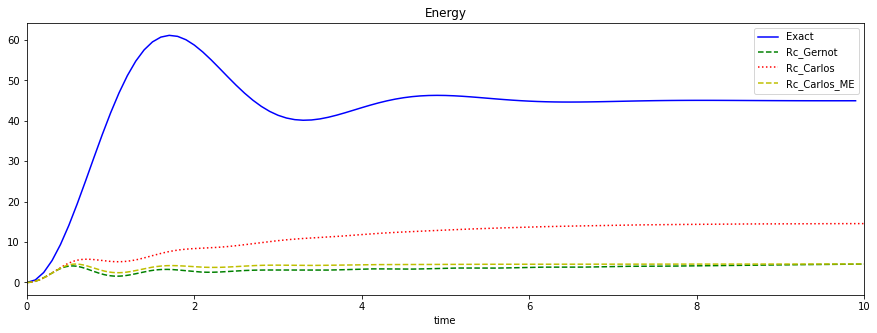

In [135]:
plt.figure(figsize=(15,5))
plt.title("Energy")
plt.rcParams['figure.figsize'] = [15,5]
#plt.plot(t3,p01,"-",label='Rc_mine', color = "g")
#plt.plot(t3,p01_carlos,"--",label='Rc_justUnitary', color = "r")
plt.plot (t2 , E1,"-",label='Exact', color = "b") ###if scaled with 1.25 they are the same
plt.plot(t,GernotE,"--",label='Rc_Gernot', color = "g")
plt.plot(t,CarlosE_SP,":",label='Rc_Carlos', color = "r")
plt.plot(t,CarlosE_ME,"--",label='Rc_Carlos_ME', color = "y")
#plt.ylim([0,0.5])
plt.xlim([0,10.0])
#plt.plot(tlist, result.expect[0])
plt.xlabel("time")
plt.legend()
plt.show()

In [136]:
def array_derivative(f, t):
    ''' Compute the derivative for a list of values of f(t)

        parameters
        ----------
        f : array
            list of values of a function
        t : array
            List of times at which the function is evaluated
        method : string
                 Difference formula: 'forward', 'backward' or 'central'
        Returns
        -------
        float
            Difference formula:
                central: f(a+h) - f(a-h))/2h
                forward: f(a+h) - f(a))/h
                backward: f(a) - f(a-h))/h
        '''
    diff_f = np.ediff1d(f)#[j-i for i, j in zip(f[:-1], f[1:])]
    diff_t = np.ediff1d(t) #[j-i for i, j in zip(times[:-1], times[1:])]
    df = [0 for i in range(len(f)-1)]
    for i in range(len(f)-1):
        df[i] = diff_f[i]/diff_t[i]
    return df

In [137]:
# Energy derivatives

GernotdE = array_derivative(GernotE,t)
CarlosdE_SP = array_derivative(CarlosE_SP,t)
CarlosdE_ME = array_derivative(CarlosE_ME,t)

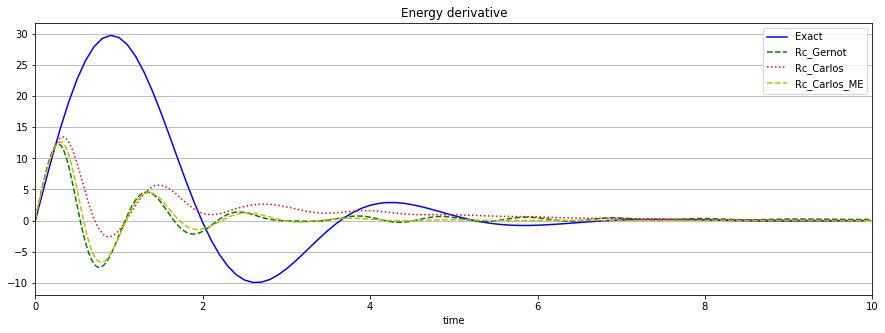

In [138]:
plt.figure(figsize=(15,5))
plt.title("Energy derivative")
plt.rcParams['figure.figsize'] = [15,5]
#plt.plot(t3,p01,"-",label='Rc_mine', color = "g")
#plt.plot(t3,p01_carlos,"--",label='Rc_justUnitary', color = "r")
plt.plot (t2 , dE1,"-",label='Exact', color = "b") ###if scaled with 1.25 they are the same
plt.plot(t[:-1],GernotdE,"--",label='Rc_Gernot', color = "g")
plt.plot(t[:-1],CarlosdE_SP,":",label='Rc_Carlos', color = "r")
plt.plot(t[:-1],CarlosdE_ME,"--",label='Rc_Carlos_ME', color = "y")
#plt.ylim([0,0.5])
plt.xlim([0,10.0])
#plt.plot(tlist, result.expect[0])
plt.grid(axis='y')
plt.xlabel("time")
plt.legend()
plt.show()